In [15]:
import numpy as np               
import pandas as pd               
import seaborn as sns            
import matplotlib.pyplot as plt   
import scipy.stats                

from scipy.cluster.hierarchy import dendrogram, linkage

import os

In [16]:
df = pd.read_csv("../input/heart.csv")

print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0   63    1   3       145   233   ...        2.3      0   0     1       1
1   37    1   2       130   250   ...        3.5      0   0     2       1
2   41    0   1       130   204   ...        1.4      2   0     2       1
3   56    1   1       120   236   ...        0.8      2   0     2       1
4   57    0   0       120   354   ...        0.6      2   0     2       1

[5 rows x 14 columns]
(303, 14)


In [17]:
df = pd.read_csv("../input/heart.csv")
df_dum=pd.get_dummies(df,columns=["sex","cp","fbs","restecg","exang","slope","thal","target"],drop_first=True)
df_dum.describe()

heart_scale = df_dum
scaler = preprocessing.StandardScaler()
columns =df_dum.columns
heart_scale[columns] = scaler.fit_transform(heart_scale[columns])
heart_scale.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target_1
0,0.952197,0.763956,-0.256334,0.015443,1.087338,-0.714429,0.681005,-0.444554,-0.634648,3.489114,2.394438,-1.003306,-0.115663,-0.696631,-0.926766,-0.939142,3.979112,-1.100763,-0.793116,0.914529
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,-0.714429,0.681005,-0.444554,1.575677,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,-0.939142,-0.251312,0.908461,-0.793116,0.914529
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-0.714429,-1.468418,2.249444,-0.634648,-0.286606,-0.417635,-1.003306,-0.115663,-0.696631,-0.926766,1.064802,-0.251312,0.908461,-0.793116,0.914529
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,-0.714429,0.681005,2.249444,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,-0.696631,-0.926766,1.064802,-0.251312,0.908461,-0.793116,0.914529
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-0.714429,-1.468418,-0.444554,-0.634648,-0.286606,-0.417635,0.996705,-0.115663,1.435481,-0.926766,1.064802,-0.251312,0.908461,-0.793116,0.914529


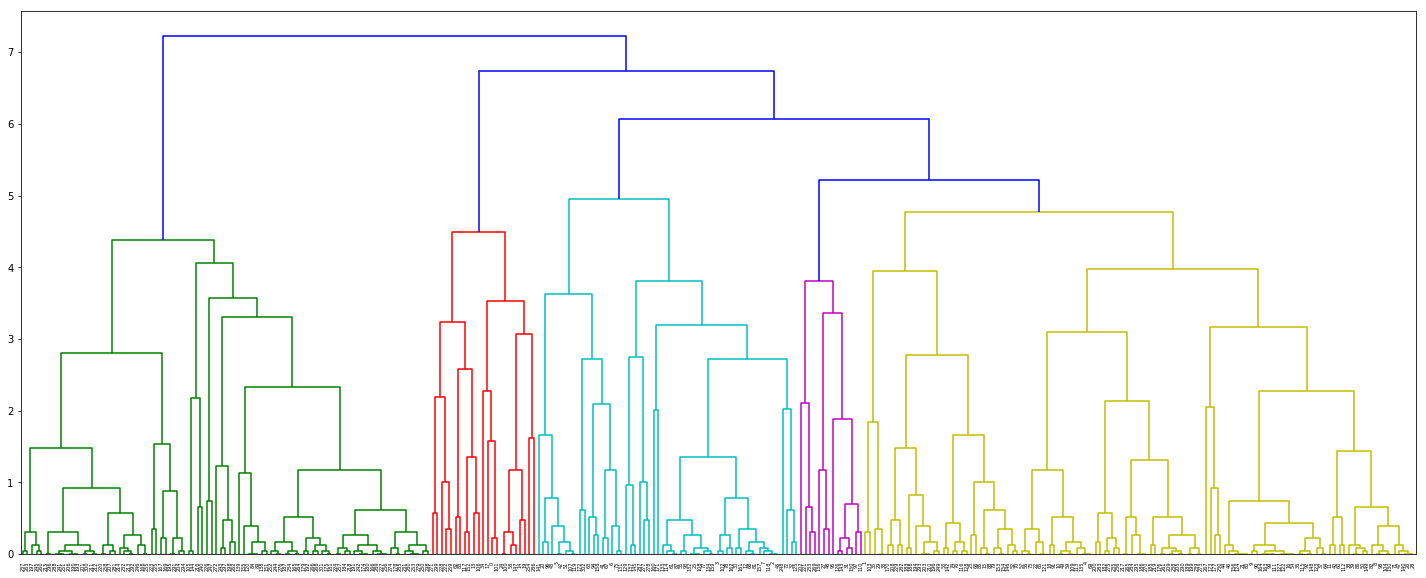

In [18]:
#Dendograma

dendograma = linkage(heart_scale.loc[:,["thalach","cp_1","cp_2","cp_3","target_1","slope_1","slope_2"]], 'complete', metric='euclidean')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(dendograma)
plt.show()